In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
# import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
# import mpld3
# mpld3.enable_notebook()

In [5]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'
# rc('text', usetex=True)

In [7]:
outdir = "output"

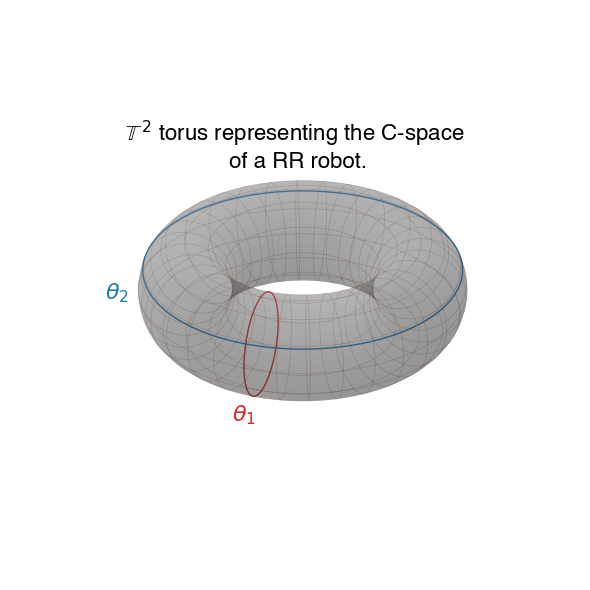

In [22]:
# # Define the major and minor radii of the torus
R = 1.0  # Major radius
r = 0.4  # Minor radius

# Create a grid of theta and phi values with increased resolution
theta = np.linspace(0, 2 * np.pi, 100)  # Increased resolution
phi = np.linspace(0, 2 * np.pi, 100)    # Increased resolution
theta, phi = np.meshgrid(theta, phi)

# Calculate the x, y, and z coordinates of points on the torus
x = (R + r * np.cos(phi)) * np.cos(theta)
y = (R + r * np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)

# Create a 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot with lighter color and transparency
surf = ax.plot_surface(x, y, z, color='gray', alpha=0.3)

# Create a wireframe plot with lighter color
# Plot theta lines
N_lines = 12
theta = np.linspace(0, 2 * np.pi, 100)
for phi in np.arange(0, 2 * np.pi, 2 * np.pi / N_lines):
    x = (R + r * np.cos(phi)) * np.cos(theta)
    y = (R + r * np.cos(phi)) * np.sin(theta)
    z = r * np.sin(phi)
    ax.plot(x, y, z, color='tab:brown', alpha=0.3, linewidth=0.5)
# Plot phi lines
N_lines = 32
phi = np.linspace(0, 2 * np.pi, 100)
for theta in np.arange(0, 2 * np.pi, 2 * np.pi / N_lines):
    x = (R + r * np.cos(phi)) * np.cos(theta)
    y = (R + r * np.cos(phi)) * np.sin(theta)
    z = r * np.sin(phi)
    ax.plot(x, y, z, color='tab:brown', alpha=0.3, linewidth=0.5)

# Calculate the x, y, and z coordinates of points on the torus
# theta
theta, phi = -0. * np.pi, np.linspace(0, 2 * np.pi, 100)
x = (R + r * np.cos(phi)) * np.cos(theta)
y = (R + r * np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)
ax.plot(x, y, z, color='tab:red', alpha=1, linewidth=1)
# phi
theta, phi = np.linspace(0, 2 * np.pi, 100), 0.15 * np.pi, 
x = (R + r * np.cos(phi)) * np.cos(theta)
y = (R + r * np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)
# ax.scatter(x, y, z, c='k', marker='.', s=1, alpha=0.7)
ax.plot(x, y, z, color='tab:blue', alpha=1, linewidth=1)


# Remove the xy, yz, and xz faces (planes)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Set the position of the axes at (0, 0, 0)
ax.spines['left'].set_position('zero')   # X-axis
ax.spines['bottom'].set_position('zero') # Y-axis
ax.spines['left'].set_position('zero')   # Z-axis (front spine)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set the number of ticks on each axis to 5
ax.xaxis.set_major_locator(MaxNLocator(3))
ax.yaxis.set_major_locator(MaxNLocator(3))
ax.zaxis.set_major_locator(MaxNLocator(3))

# Remove the grid lines on the xy, yz, and xz planes
ax.grid(False)

# Set the view angle (elevation and azimuthal angles)
ax.view_init(elev=30, azim=20)  # Adjust these angles as needed

# Set custom axis limits
ax.set_xlim([-1.5, 1.5])  # X-axis limits
ax.set_ylim([-1.5, 1.5])  # Y-axis limits
ax.set_zlim([-1, 1])  # Z-axis limits

# Add text labels for theta1 and theta2
theta2_text = ax.text(x=-1.1, y=-1.1, z=-2, s='$\\theta_1$', color='tab:red', fontsize=16)
theta1_text = ax.text(x=-1, y=-2.3, z=-1, s='$\\theta_2$', color='tab:blue', fontsize=16)

ax.set_title('$\mathbb{T}$ $^2$ torus representing the C-space \n of a RR robot.', y=0.77, fontsize=16)

ax.set_axis_off()
plt.tight_layout()

# Save fig
fig.savefig(pathlib.Path(outdir, "torus2.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "torus2.svg"), bbox_inches='tight')   
